## 1.1

导包

In [2]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

加载数据

In [3]:

data_path = './data/1.1.csv'

with open(data_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    data_csv = list(reader)
data = {"Animal": [], "Weight": [], "Heart Rate": []}
for row in data_csv[1:]:
    data["Animal"].append(row[0])
    data["Weight"].append(float(row[1]))
    data["Heart Rate"].append(float(row[2]))

df = pd.DataFrame(data)
print(df.head()) # 看看数据长什么样

  Animal  Weight  Heart Rate
0   伏翼蝙蝠     4.0       660.0
1     田鼠    25.0       670.0
2     家鼠   200.0       420.0
3     豚鼠   300.0       300.0
4      兔  2000.0       205.0


### 1.1 ver.1

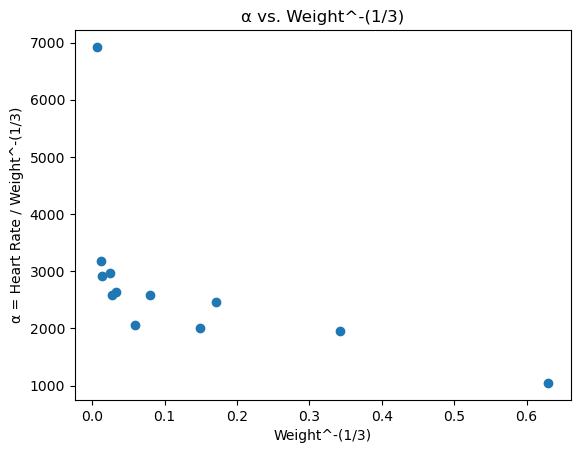

mean(α) = [2775.24421642]


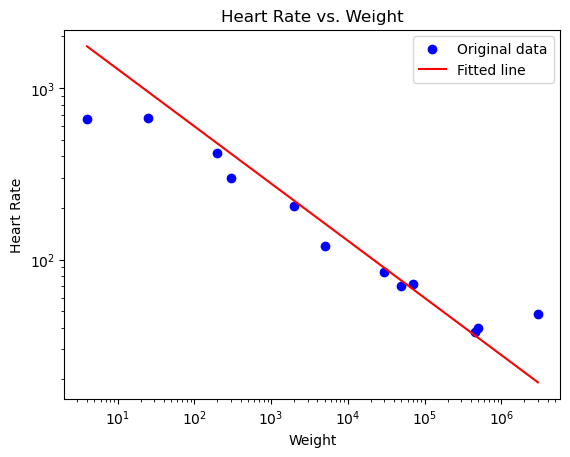

In [3]:
# 假设 HR = α * W^{-\frac{1}{3}}
# 求解 α，
output = list()
for i in range(len(data["Animal"])):
    output.append([data["Weight"][i]**-(1/3), data["Heart Rate"][i] / (data["Weight"][i] ** -(1/3))])
output = np.array(output)
alpha = np.array([np.mean(output[:,1])])

# 可视化为：纵α，横Weight
plt.scatter(output[:, 0], output[:, 1])
plt.xlabel('Weight^-(1/3)')
plt.ylabel('α = Heart Rate / Weight^-(1/3)')
plt.title("α vs. Weight^-(1/3)")
plt.show()

# 查看曲线与数据的拟合情况
print(f'mean(α) = {alpha}')

plt.scatter(df["Weight"], df["Heart Rate"], color='blue', label='Original data')
plt.plot(df["Weight"], alpha * (df["Weight"] ** -(1/3)), color='red', label='Fitted line')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel("Weight")
plt.ylabel("Heart Rate")
plt.title("Heart Rate vs. Weight")
plt.show()

### 1.1 ver.2

alpha: 1179.86548061741, slope: -0.24612020432642506
回归模型: log(HR) = 7.073 + -0.246 * log(W)
幂律模型: HR = 1179.9 * W^-0.246


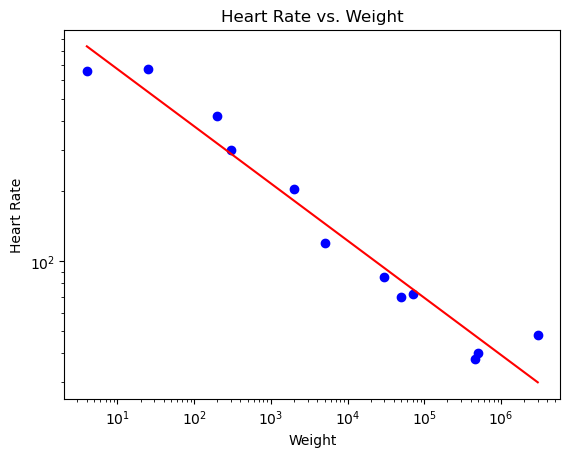

In [4]:
X = np.log(df["Weight"]).values.reshape(-1, 1)
y = np.log(df["Heart Rate"])

model = LinearRegression().fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
alpha = np.exp(model.intercept_)
print(f"alpha: {alpha}, slope: {slope}")

print(f"回归模型: log(HR) = {intercept:.3f} + {slope:.3f} * log(W)")
print(f"幂律模型: HR = {alpha:.1f} * W^{slope:.3f}")



plt.scatter(df["Weight"], df["Heart Rate"], color='blue')
plt.plot(df["Weight"], alpha * df["Weight"] ** slope, color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Weight")
plt.ylabel("Heart Rate")
plt.title("Heart Rate vs. Weight")
plt.show()

### 1.1 ver.3

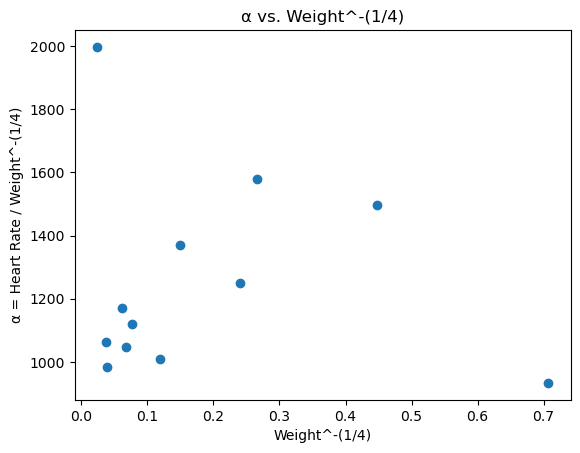

mean(α) = [1251.799953]


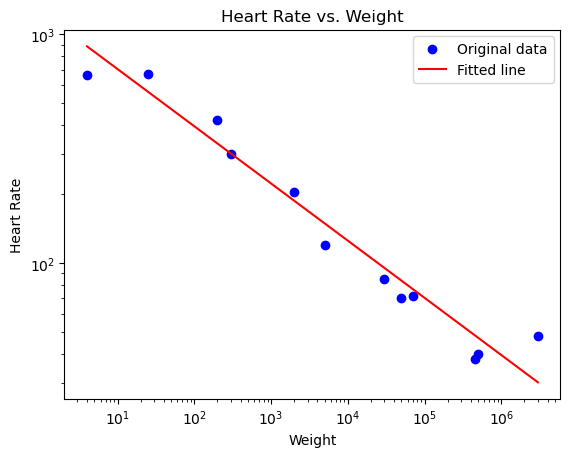

In [5]:

# 假设 HR = α * W^{-\frac{1}{4}}
# 求解 α，
output = list()
for i in range(len(data["Animal"])):
    output.append([data["Weight"][i]**-(1/4), data["Heart Rate"][i] / (data["Weight"][i] ** -(1/4))])
output = np.array(output)
alpha = np.array([np.mean(output[:,1])])

plt.scatter(output[:, 0], output[:, 1])
plt.xlabel('Weight^-(1/4)')
plt.ylabel('α = Heart Rate / Weight^-(1/4)')
plt.title("α vs. Weight^-(1/4)")
plt.show()

print(f'mean(α) = {alpha}')

plt.scatter(df["Weight"], df["Heart Rate"], color='blue', label='Original data')
plt.plot(df["Weight"], alpha * (df["Weight"] ** -(1/4)), color='red', label='Fitted line')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel("Weight")
plt.ylabel("Heart Rate")
plt.title("Heart Rate vs. Weight")
plt.show()